This is a jupyter notebook to get all the data from my shapefiles, group together the objects with the same label and then save the data as png images of a size 10000 x 10000 pix (which correspond to the size of my bounding boxes).

In [50]:
import geopandas as gpd
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from shapely.geometry import Point, Polygon
from matplotlib.collections import PatchCollection
from descartes.patch import PolygonPatch

import os
import numpy as np

# Load the box module from shapely to create box objects
from shapely.geometry import box

## Raster data library
import rasterio
import rasterio.features
import rasterio.warp
from rasterio import plot as rioplot

# to display images inline
get_ipython().magic(u'matplotlib inline')
matplotlib.use('Agg')# not sure what I used it for

# some custom files
from img_helpers import get_all_images_in_folder

ImportError: cannot import name 'cutimage'

In [2]:
# define the region folder
global_path = "D:/allegoria/datasets_alegoria/BD/BD_topo/moselle/BDTOPO_3-0_TOUSTHEMES_SHP_LAMB93_D057_2019-03-19/BDTOPO/1_DONNEES_LIVRAISON_2019-03-00260"

## ROADS

In [3]:
# load all the shapely files related to ROADS
fp_road = global_path + "/BDT_3-0_SHP_LAMB93_D057-ED2019-03-19/TRANSPORT/ROUTE_NUMEROTEE_OU_NOMMEE.shp"
fp_road_troncon = global_path + "/BDT_3-0_SHP_LAMB93_D057-ED2019-03-19/TRANSPORT/TRONCON_DE_ROUTE.shp"
# Read file using gpd.read_file()
data_road = gpd.read_file(fp_road)
data_road_troncon =  gpd.read_file(fp_road_troncon)
frames = [data_road, data_road_troncon]
# make a single table with all the roads, not just a signle type
all_roads=  pd.concat(frames,ignore_index=True,sort=False) 

In [4]:
all_roads.head() # small demo of the roads 

,ID,TYPE_ROUTE,NUMERO,TOPONYME,STATUT_TOP,DATE_CREAT,DATE_MAJ,DATE_APP,DATE_CONF,SOURCE,...,C_POSTAL_G,C_POSTAL_D,DATE_SERV,ID_VOIE_G,ID_VOIE_D,ID_RN,NUM_EUROP,CL_ADMIN,ITI_CYCL,VOIE_VERTE
0,ROUTNOMM0000000004450727,Route nommÃ©e,None,Autoroute de l'Est,ValidÃ©,2006-05-23 13:43:10,2019-03-11 22:00:01,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ROUTNOMM0000000010357940,DÃ©partementale,D59C,None,None,2006-08-02 12:50:59,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ROUTNOMM0000000054035783,DÃ©partementale,D674,None,None,2007-01-25 11:28:20,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ROUTNOMM0000000054035585,DÃ©partementale,D10,None,None,2007-01-25 11:28:20,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ROUTNOMM0000000054035500,DÃ©partementale,D28D,None,None,2007-01-25 11:28:20,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


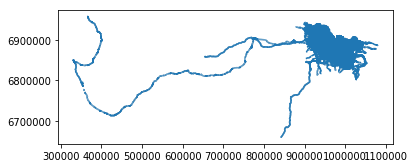

In [5]:
# we can plot all the Roads network of cote d'Or
all_roads.plot()

Data type - geographical projection of he data used.

In [6]:
# check the projection of the data - I need espg 2154, otherwise re-project using geopandas
all_roads.crs
len(all_roads)

326882

## Houses

In [7]:
# Load all the data from the BUILDINGS caegory
fp_bati = global_path + "/BDT_3-0_SHP_LAMB93_D057-ED2019-03-19/BATI/BATIMENT.shp"
# Read file using gpd.read_file()
buildings1= gpd.read_file(fp_bati)
all_buildings =  buildings1 #pd.concat([buildings1, buildings2, buildings3, buildings4],ignore_index=True )

In [8]:
all_buildings.crs

{'init': 'epsg:2154'}

In [9]:
all_buildings.head() 

,ID,NATURE,USAGE1,USAGE2,LEGER,ETAT,DATE_CREAT,DATE_MAJ,DATE_APP,DATE_CONF,...,MAT_MURS,MAT_TOITS,HAUTEUR,Z_MIN_SOL,Z_MIN_TOIT,Z_MAX_TOIT,Z_MAX_SOL,ORIGIN_BAT,APP_FF,geometry
0,BATIMENT0000000315705179,"Industriel, agricole ou commercial",Agricole,None,Oui,En service,2012-11-20 20:11:13,2016-06-20 09:09:36,None,None,...,None,None,7.8,259.3,267.1,NaN,NaN,Cadastre,None,"POLYGON Z ((980585.2 6876847.7 267.1, 980577.2..."
1,BATIMENT0000000315705180,"Industriel, agricole ou commercial",Agricole,None,Non,En service,2012-11-20 20:11:13,2016-06-20 09:09:36,None,None,...,None,None,7.4,259.3,266.7,NaN,NaN,Cadastre,None,"POLYGON Z ((980592.9 6876806.3 266.7, 980571.7..."
2,BATIMENT0000000315705181,"Industriel, agricole ou commercial",Agricole,None,Oui,En service,2012-11-20 20:11:13,2016-06-20 09:09:36,None,None,...,None,None,7.2,259.0,266.2,NaN,NaN,Cadastre,None,"POLYGON Z ((980585.2 6876847.7 266.2, 980581.4..."
3,BATIMENT0000000315705184,"Industriel, agricole ou commercial",Agricole,None,Oui,En service,2012-11-20 20:11:13,2016-06-20 09:09:36,None,None,...,None,None,6.0,259.3,265.3,NaN,NaN,Cadastre,None,"POLYGON Z ((980567.4 6876828.2 265.3, 980571.7..."
4,BATIMENT0000000315396796,"Industriel, agricole ou commercial",Agricole,None,Oui,En service,2012-11-13 09:01:45,2016-06-20 09:10:02,None,None,...,None,None,7.3,228.6,235.9,NaN,NaN,Cadastre,None,"POLYGON Z ((980699.6 6869087.9 235.9, 980689 6..."


In [10]:
all_buildings.NATURE.unique()

array(['Industriel, agricole ou commercial', 'IndiffÃ©renciÃ©e',
       'Chapelle', 'Tour, donjon', 'Fort, blockhaus, casemate', 'Tribune',
       'Serre', 'Eglise', 'Silo', 'Monument', 'ChÃ¢teau',
       'Arc de triomphe'], dtype=object)

In [11]:
# separate all the buldings depending on the label
churches = all_buildings.NATURE=='Eglise'

In [12]:
churches = all_buildings.loc[(all_buildings['NATURE'] == "Eglise") | (all_buildings['NATURE'] == "Chapelle")]
towers = all_buildings.loc[all_buildings['NATURE'] == "Tour, donjon"]
monuments = all_buildings.loc[all_buildings['NATURE'] == "Monument"]  
forts = all_buildings.loc[all_buildings['NATURE'] == 'Fort, blockhaus, casemate']
castels = all_buildings.loc[all_buildings['NATURE'] =='ChÃ¢teau']
arcs =  all_buildings.loc[all_buildings['NATURE'] =='Arc de triomphe']
ordinary_buildings =all_buildings.loc[(all_buildings['NATURE']=='IndiffÃ©renciÃ©e') | (all_buildings['NATURE'] == "Industriel, agricole ou commercial")]

In [13]:
print("statisics over all POI objects. There %d churches, %d towers, %d monuments, %d forts, %d castles, %d arcs and % ordinary buildings" 
      %(len(churches),len(towers),len(monuments), len(forts), len(castels), len(arcs), len(ordinary_buildings)))

statisics over all POI objects. There 2195 churches, 170 towers, 8 monuments, 734 forts, 245 castles, 12 arcs and  3473672rdinary buildings


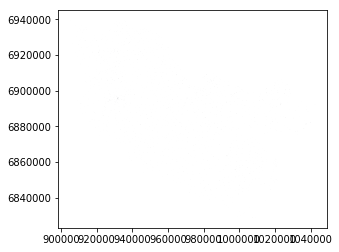

In [14]:
churches.plot()

## WATER 

{'init': 'epsg:2154'}

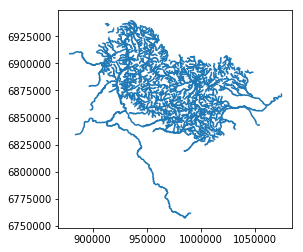

In [15]:
fp_water =  global_path + "/BDT_3-0_SHP_LAMB93_D057-ED2019-03-19/HYDROGRAPHIE/COURS_D_EAU.shp"
fp_plan = global_path + "/BDT_3-0_SHP_LAMB93_D057-ED2019-03-19/HYDROGRAPHIE/PLAN_D_EAU.shp"
fp_surface = global_path + "/BDT_3-0_SHP_LAMB93_D057-ED2019-03-19/HYDROGRAPHIE/SURFACE_HYDROGRAPHIQUE.shp"
data_water = gpd.read_file(fp_water)
data_plan = gpd.read_file(fp_plan)
data_surface = gpd.read_file(fp_surface)
# make a single table with all the roads, not just a signle type
all_water =  pd.concat([data_water, data_plan, data_surface],ignore_index=True,sort=False) 
all_water.plot()
len(all_water)
data_water.crs

## SPORT TERRITORIES

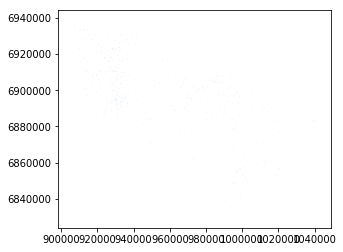

In [16]:
fp_sport = global_path +  "/BDT_3-0_SHP_LAMB93_D057-ED2019-03-19/BATI/TERRAIN_DE_SPORT.shp"
data_sport = gpd.read_file(fp_sport)
data_sport.plot()

In [17]:
len(data_sport)

2859

## CEMETRIES

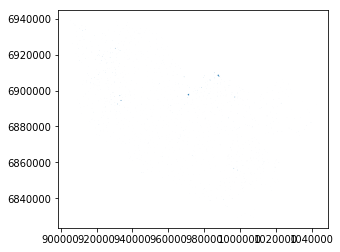

In [18]:
fp_cemetries = global_path +  "/BDT_3-0_SHP_LAMB93_D057-ED2019-03-19/BATI/CIMETIERE.shp"
data_cemetries = gpd.read_file(fp_cemetries)
data_cemetries.plot()


## GREENERY

164435

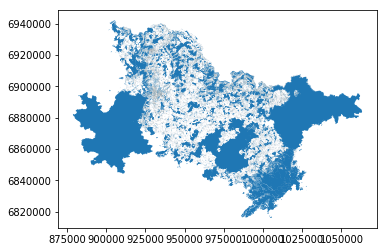

In [19]:
fp_greenery = global_path + "/BDT_3-0_SHP_LAMB93_D057-ED2019-03-19/OCCUPATION_DU_SOL/ZONE_DE_VEGETATION.shp"
fp_parks = global_path + "/BDT_3-0_SHP_LAMB93_D057-ED2019-03-19/ZONES_REGLEMENTEES/PARC_OU_RESERVE.shp"
fp_public_forest = global_path + "/BDT_3-0_SHP_LAMB93_D057-ED2019-03-19/ZONES_REGLEMENTEES/FORET_PUBLIQUE.shp"
data_greenery = gpd.read_file(fp_greenery)
data_parks = gpd.read_file(fp_parks)
data_pubforest = gpd.read_file(fp_public_forest)
all_greenery =  pd.concat([data_greenery, data_parks, data_pubforest],ignore_index=True,sort=False) 
all_greenery.plot()
len(all_greenery )

## AERODROMES


67

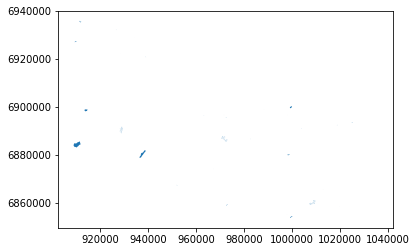

In [20]:
fp_aero = global_path + "/BDT_3-0_SHP_LAMB93_D057-ED2019-03-19/TRANSPORT/AERODROME.shp"
fp_pistes = global_path + "/BDT_3-0_SHP_LAMB93_D057-ED2019-03-19/TRANSPORT/PISTE_D_AERODROME.shp"

data_aero = gpd.read_file(fp_aero)
data_pistes = gpd.read_file(fp_pistes)
data_aero =  pd.concat([data_aero, data_pistes],ignore_index=True,sort=False) 
data_aero.plot()
len(data_aero)

## RAILROADS

3

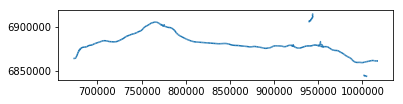

In [21]:
fp_rail = global_path + "/BDT_3-0_SHP_LAMB93_D057-ED2019-03-19/TRANSPORT/VOIE_FERREE_NOMMEE.shp"
data_rail  = gpd.read_file(fp_rail)
data_rail.plot()
len(data_rail)


## BOUNDING BOXES FROM THE IMAGES

Finally, load the bounding boxes from all the jp2 images I have for a department. I actually don't use them later, taking the bounding box from the jp2 meta data, but alternatively they can be used as bounding boxes for vector data.

In [22]:
bb_boxes_path ="D:/allegoria/datasets_alegoria/BD/BD_ortho/mozelle/BDORTHO_2-0_RVB-0M50_JP2-E080_LAMB93_D057_2015-01-01/BDORTHO/5_SUPPLEMENTS_LIVRAISON_2016-02-00008/BDO_RVB_0M50_JP2-E080_LAMB93_D57-2015/dalles.shp"
bb_boxes= gpd.read_file(bb_boxes_path)
bb_boxes.crs

{}

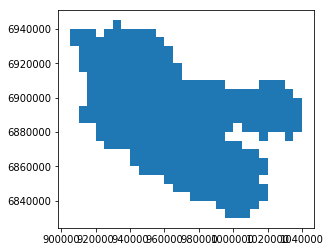

In [23]:
bb_boxes.plot()

## IMAGES as JP2

Load all the jp2 images from the folder and store the absolute path in a list.

In [24]:
folder = 'D:/allegoria/datasets_alegoria/BD/BD_ortho/mozelle/BDORTHO_2-0_RVB-0M50_JP2-E080_LAMB93_D057_2015-01-01/BDORTHO/1_DONNEES_LIVRAISON_2016-02-00008/BDO_RVB_0M50_JP2-E080_LAMB93_D57-2015'
img_type = '.jp2'
image_files = get_all_images_in_folder(folder, img_type)
name = image_files[0][-36:]
print(name)

57-2015-0905-6935-LA93-0M50-E080.jp2


## Save the shape files as .png in correspondence with given images

The function below works very slow, long to execute but the files are really huge - 10000x10000 pixels.
I store each shapefile object on a separate canvas, which is then saved as a .png image. 
Attention, this version save the images with a bounding box around them, look at the next script to see how the bounding box can be disabled.

## SAVE all LABELS on ONE image

This script saves the jp2 image as a tif one, and also all the shapefiles in different colors on a separate canvas. The frame around the image is deleted. The final files are of the same size as the original jp2 file.

In [ ]:
plt.ioff() # don't plot anything here
import matplotlib as mpl

mpl.rcParams['savefig.pad_inches'] = 0
save_path = 'D:/allegoria/topo_ortho/mozelle/lbl_png/'

my_dpi=300
for i in range(1): # range - number of images len(image_files)
    name = image_files[i][-36:]
    print(name)
    with rasterio.open(image_files[i]) as dataset:
    # Read the dataset's valid data mask as a ndarray.
        mask = dataset.dataset_mask()
        # Extract feature shapes and values from the array.
        for geom, val in rasterio.features.shapes(
                mask, transform=dataset.transform):
            # Transform shapes from the dataset's own coordinate
            # reference system to CRS84 (EPSG:4326).
            geom = rasterio.warp.transform_geom(
                dataset.crs, 'epsg:2154', geom, precision=6)

            # Print GeoJSON shapes to stdout.
            print(geom)
      
            raster = dataset.read()
    
       #  some setup
        bb_box = geom['coordinates']
        polygon_bbox = Polygon(bb_box[0])

        # bounding boxes coordinates
        coordinates = bb_box[0]
        x_width, y_width =  (coordinates[2][0]-coordinates[0][0])*2, (coordinates[0][1]-coordinates[1][1])*2
        print(x_width, y_width)
        # save the image

        fig, ax = plt.subplots(figsize=(x_width/float(10*my_dpi), y_width/float(10*my_dpi)))
        rasterio.plot.show(raster, ax=ax)       
        plt.axis('off')
        fig.tight_layout()
        plt.autoscale(False)
        plt.savefig('D:/allegoria/topo_ortho/mozelle/img_tif/'+name[0:-4]+'.tif', type="tif", dpi= my_dpi*10,
                   bbox_inches="tight", pad_inches=0)
        plt.clf()
        plt.close('all')
                    
        # from now on all the shape data            


        # shapefiles
        sg_roads = all_roads[all_roads.geometry.within(polygon_bbox)] #extract segments of roads
        
        sg_houses = ordinary_buildings[ordinary_buildings.geometry.within(polygon_bbox)] #extract segments of ordinary buildings
        sg_churches =  churches[churches.geometry.within(polygon_bbox)] #churches
        sg_towers =  towers[towers.geometry.within(polygon_bbox)] #towers
        sg_monuments =  monuments[monuments.geometry.within(polygon_bbox)] #monuments
        sg_forts =   monuments[monuments.geometry.within(polygon_bbox)] #forts
        sg_castels = castels[castels.geometry.within(polygon_bbox)] # chateux
        sg_arcs =arcs[arcs.geometry.within(polygon_bbox)] # arcs
        
        sg_water = all_water[all_water.geometry.within(polygon_bbox)] #extract segments of water
        
        sg_sport = data_sport[data_sport.geometry.within(polygon_bbox)] #extract segments of sport  things
        
        sg_cemetries = data_cemetries[data_cemetries.geometry.within(polygon_bbox)] # cemetries
        
        sg_aero = data_aero[data_aero.geometry.within(polygon_bbox)] # aeroports
        
        sg_railroads = data_rail[data_rail.geometry.within(polygon_bbox)] # railroads
        
        sg_greenery = all_greenery[all_greenery.geometry.within(polygon_bbox)] # forests
        
      
        #plotting & saving
        
        

        name_wpath = save_path + name[0:-4] + '.png'

        
        fig = plt.figure() 
        plt.margins(0)
        fig = sg_greenery.plot(figsize=(x_width/float(10*my_dpi), y_width/float(10*my_dpi)), color='#00FF00')
        sg_water.plot(figsize=(x_width/float(10*my_dpi), y_width/float(10*my_dpi)), color ='#0000FF', ax=fig)
        sg_roads.plot(figsize=(x_width/float(10*my_dpi), y_width/float(10*my_dpi)),linewidth=0.21, edgecolor='#FFA500', ax = fig)
        sg_sport.plot(figsize=(x_width/float(10*my_dpi), y_width/float(10*my_dpi)), color ='#8A2BE2', ax = fig)
        sg_houses.plot(figsize=(x_width/float(10*my_dpi), y_width/float(10*my_dpi)), color ='#FF0000', ax = fig)
        sg_churches.plot(figsize=(x_width/float(10*my_dpi), y_width/float(10*my_dpi)), color ='#FFFF00', ax = fig)
        sg_towers.plot(figsize=(x_width/float(10*my_dpi), y_width/float(10*my_dpi)), color ="#A52A2A", ax = fig)
        sg_monuments.plot(figsize=(x_width/float(10*my_dpi), y_width/float(10*my_dpi)), color ='#F5F5DC', ax = fig)
        sg_forts.plot(figsize=(x_width/float(10*my_dpi), y_width/float(10*my_dpi)), color='#808080', ax = fig)
        sg_castels.plot(figsize=(x_width/float(10*my_dpi), y_width/float(10*my_dpi)),  color='#000000', ax = fig)
        sg_arcs.plot(figsize=(x_width/float(10*my_dpi), y_width/float(10*my_dpi)),  color='#C2B280', ax = fig)
        sg_cemetries.plot(figsize=(x_width/float(10*my_dpi), y_width/float(10*my_dpi)), color ='#4B0082', ax = fig) 
        sg_aero.plot(figsize=(x_width/float(10*my_dpi), y_width/float(10*my_dpi)), color ='#5F021F', ax = fig)
        sg_railroads.plot(figsize=(x_width/float(10*my_dpi), y_width/float(10*my_dpi)), color = '#FF00FF', ax = fig)
    
        plt.autoscale(False)  
        plt.axis('off')
        ax.set_xlim([coordinates[0][0],coordinates[2][0]])
        ax.set_ylim([coordinates[1][1],coordinates[0][1]])
        plt.autoscale(False)
        plt.savefig(name_wpath, type="png", dpi= float(my_dpi) * 10,  bbox_inches="tight", pad_inches=0)
        
        dataset.close()
        plt.clf()
        plt.close('all')


    

## TEST VISUALIZATION

Just an example of how to plot vector data on a  raster image using rasterio and matplotlib.

{'type': 'Polygon', 'coordinates': [[[905000.0, 6934999.999999], [905000.0, 6929999.999999], [910000.0, 6929999.999999], [910000.0, 6934999.999999], [905000.0, 6934999.999999]]]}


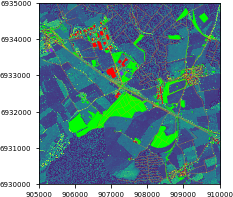

In [158]:
from matplotlib import pyplot
get_ipython().magic(u'matplotlib inline')
matplotlib.rc('xtick', labelsize=5) 
matplotlib.rc('ytick', labelsize=5) 

my_dpi=300
i = 1
with rasterio.open(image_files[0]) as dataset: #an image name as an input
    # Read the dataset's valid data mask as a ndarray.
    mask = dataset.dataset_mask()

    # Extract feature shapes and values from the array.
    for geom, val in rasterio.features.shapes(
            mask, transform=dataset.transform):

        # Transform shapes from the dataset's own coordinate
        # reference system to CRS84 (EPSG:4326).
        geom = rasterio.warp.transform_geom(
            dataset.crs, 'epsg:2154', geom, precision=6)

        # Print GeoJSON shapes to stdout.
        print(geom)

raster = rasterio.open(image_files[0])

name = image_files[i][-36:]

bb_box = geom['coordinates']
polygon_bbox = Polygon(bb_box[0])

coordinates = bb_box[0]
x_width, y_width =  (coordinates[2][0]-coordinates[0][0])*2, (coordinates[0][1]-coordinates[1][1])*2

# shapefiles
sg_roads = all_roads[all_roads.geometry.within(polygon_bbox)] #extract segments of roads
sg_houses = ordinary_buildings[ordinary_buildings.geometry.within(polygon_bbox)] #extract segments of ordinary buildings
sg_churches =  churches[churches.geometry.within(polygon_bbox)] #churches
sg_towers =  towers[towers.geometry.within(polygon_bbox)] #towers
sg_monuments =  monuments[monuments.geometry.within(polygon_bbox)] #monuments
sg_forts =   monuments[monuments.geometry.within(polygon_bbox)] #forts
sg_castels = castels[castels.geometry.within(polygon_bbox)] # chateux
sg_arcs =arcs[arcs.geometry.within(polygon_bbox)] # arcs

sg_water = all_water[all_water.geometry.within(polygon_bbox)] #extract segments of water

sg_sport = data_sport[data_sport.geometry.within(polygon_bbox)] #extract segments of sport  things

sg_cemetries = data_cemetries[data_cemetries.geometry.within(polygon_bbox)] # cemetries

sg_aero = data_aero[data_aero.geometry.within(polygon_bbox)] # aeroports

sg_railroads = data_rail[data_rail.geometry.within(polygon_bbox)] # railroads

sg_greenery = all_greenery[all_greenery.geometry.within(polygon_bbox)] # forests


fig, ax = plt.subplots(figsize=(x_width/float(10*my_dpi), y_width/float(10*my_dpi)))
rasterio.plot.show(raster, ax=ax)
sg_greenery.plot(color='#00FF00', ax = ax)
sg_water.plot(color ='#0000FF', ax=ax)
sg_roads.plot(linewidth=0.21, edgecolor='#FFA500', ax = ax)
sg_sport.plot (color ='#8A2BE2', ax = ax)
sg_houses.plot(color ='#FF0000', ax = ax)
sg_churches.plot(color ='#FFFF00', ax = ax)
sg_towers.plot(color ="#A52A2A", ax = ax)
sg_monuments.plot(color ='#F5F5DC', ax = ax)
sg_forts.plot(color='#808080', ax = ax)
sg_castels.plot(color='#000000', ax = ax)
sg_arcs.plot(color='#C2B280', ax = ax)
sg_cemetries.plot(color ='#4B0082', ax = ax) 
sg_aero.plot(color ='#5F021F', ax = ax)
sg_railroads.plot(color = '#FF00FF', ax = ax)
plt.margins(2.0)
plt.autoscale(False)
plt.savefig("D:/allegoria/topo_ortho/mozelle/example.png", type="png", dpi= float(my_dpi) * 10) # save the resulting figure
plt.show()


## image Patching and saving

In [337]:
## An attempt to cut all the images right away given the coordinates
import csv
import os
from PIL import Image
from matplotlib import transforms

resolution = 1000 # the resolution in geo coordinates, the real pixel size will be  Resolution X 2


57-2015-0905-6935-LA93-0M50-E080.jp2
already exists!


KeyboardInterrupt: 

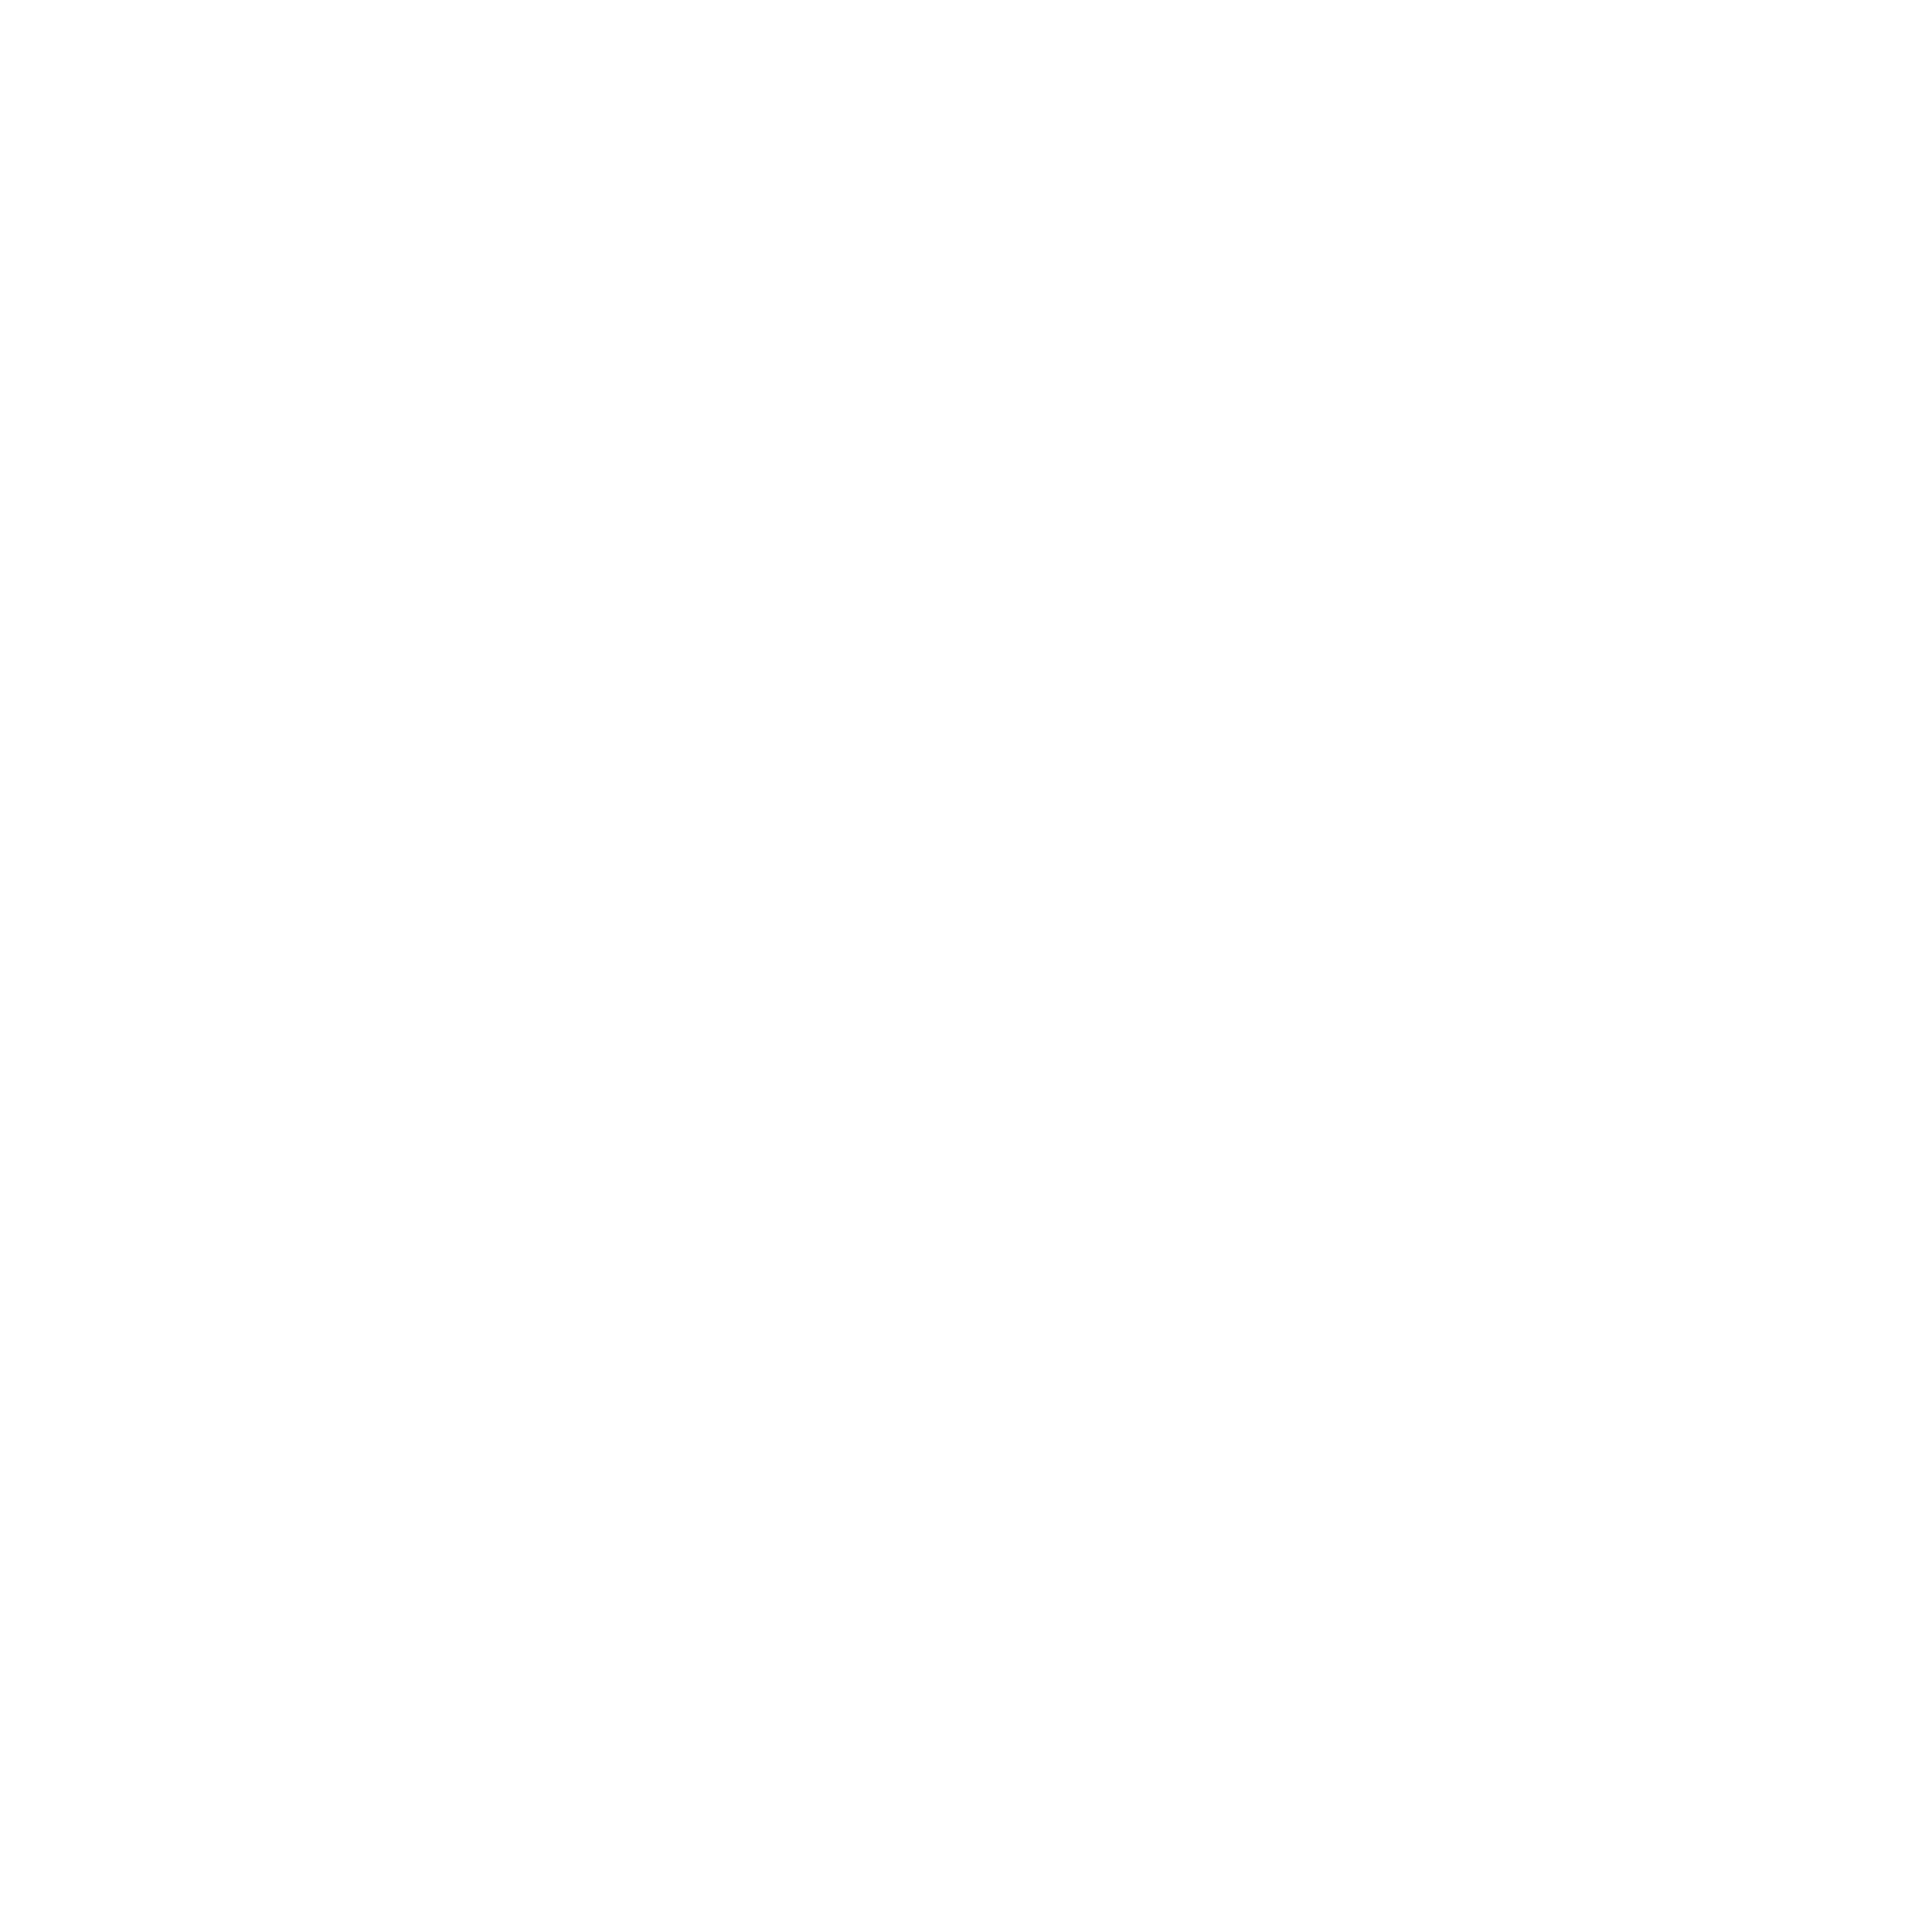

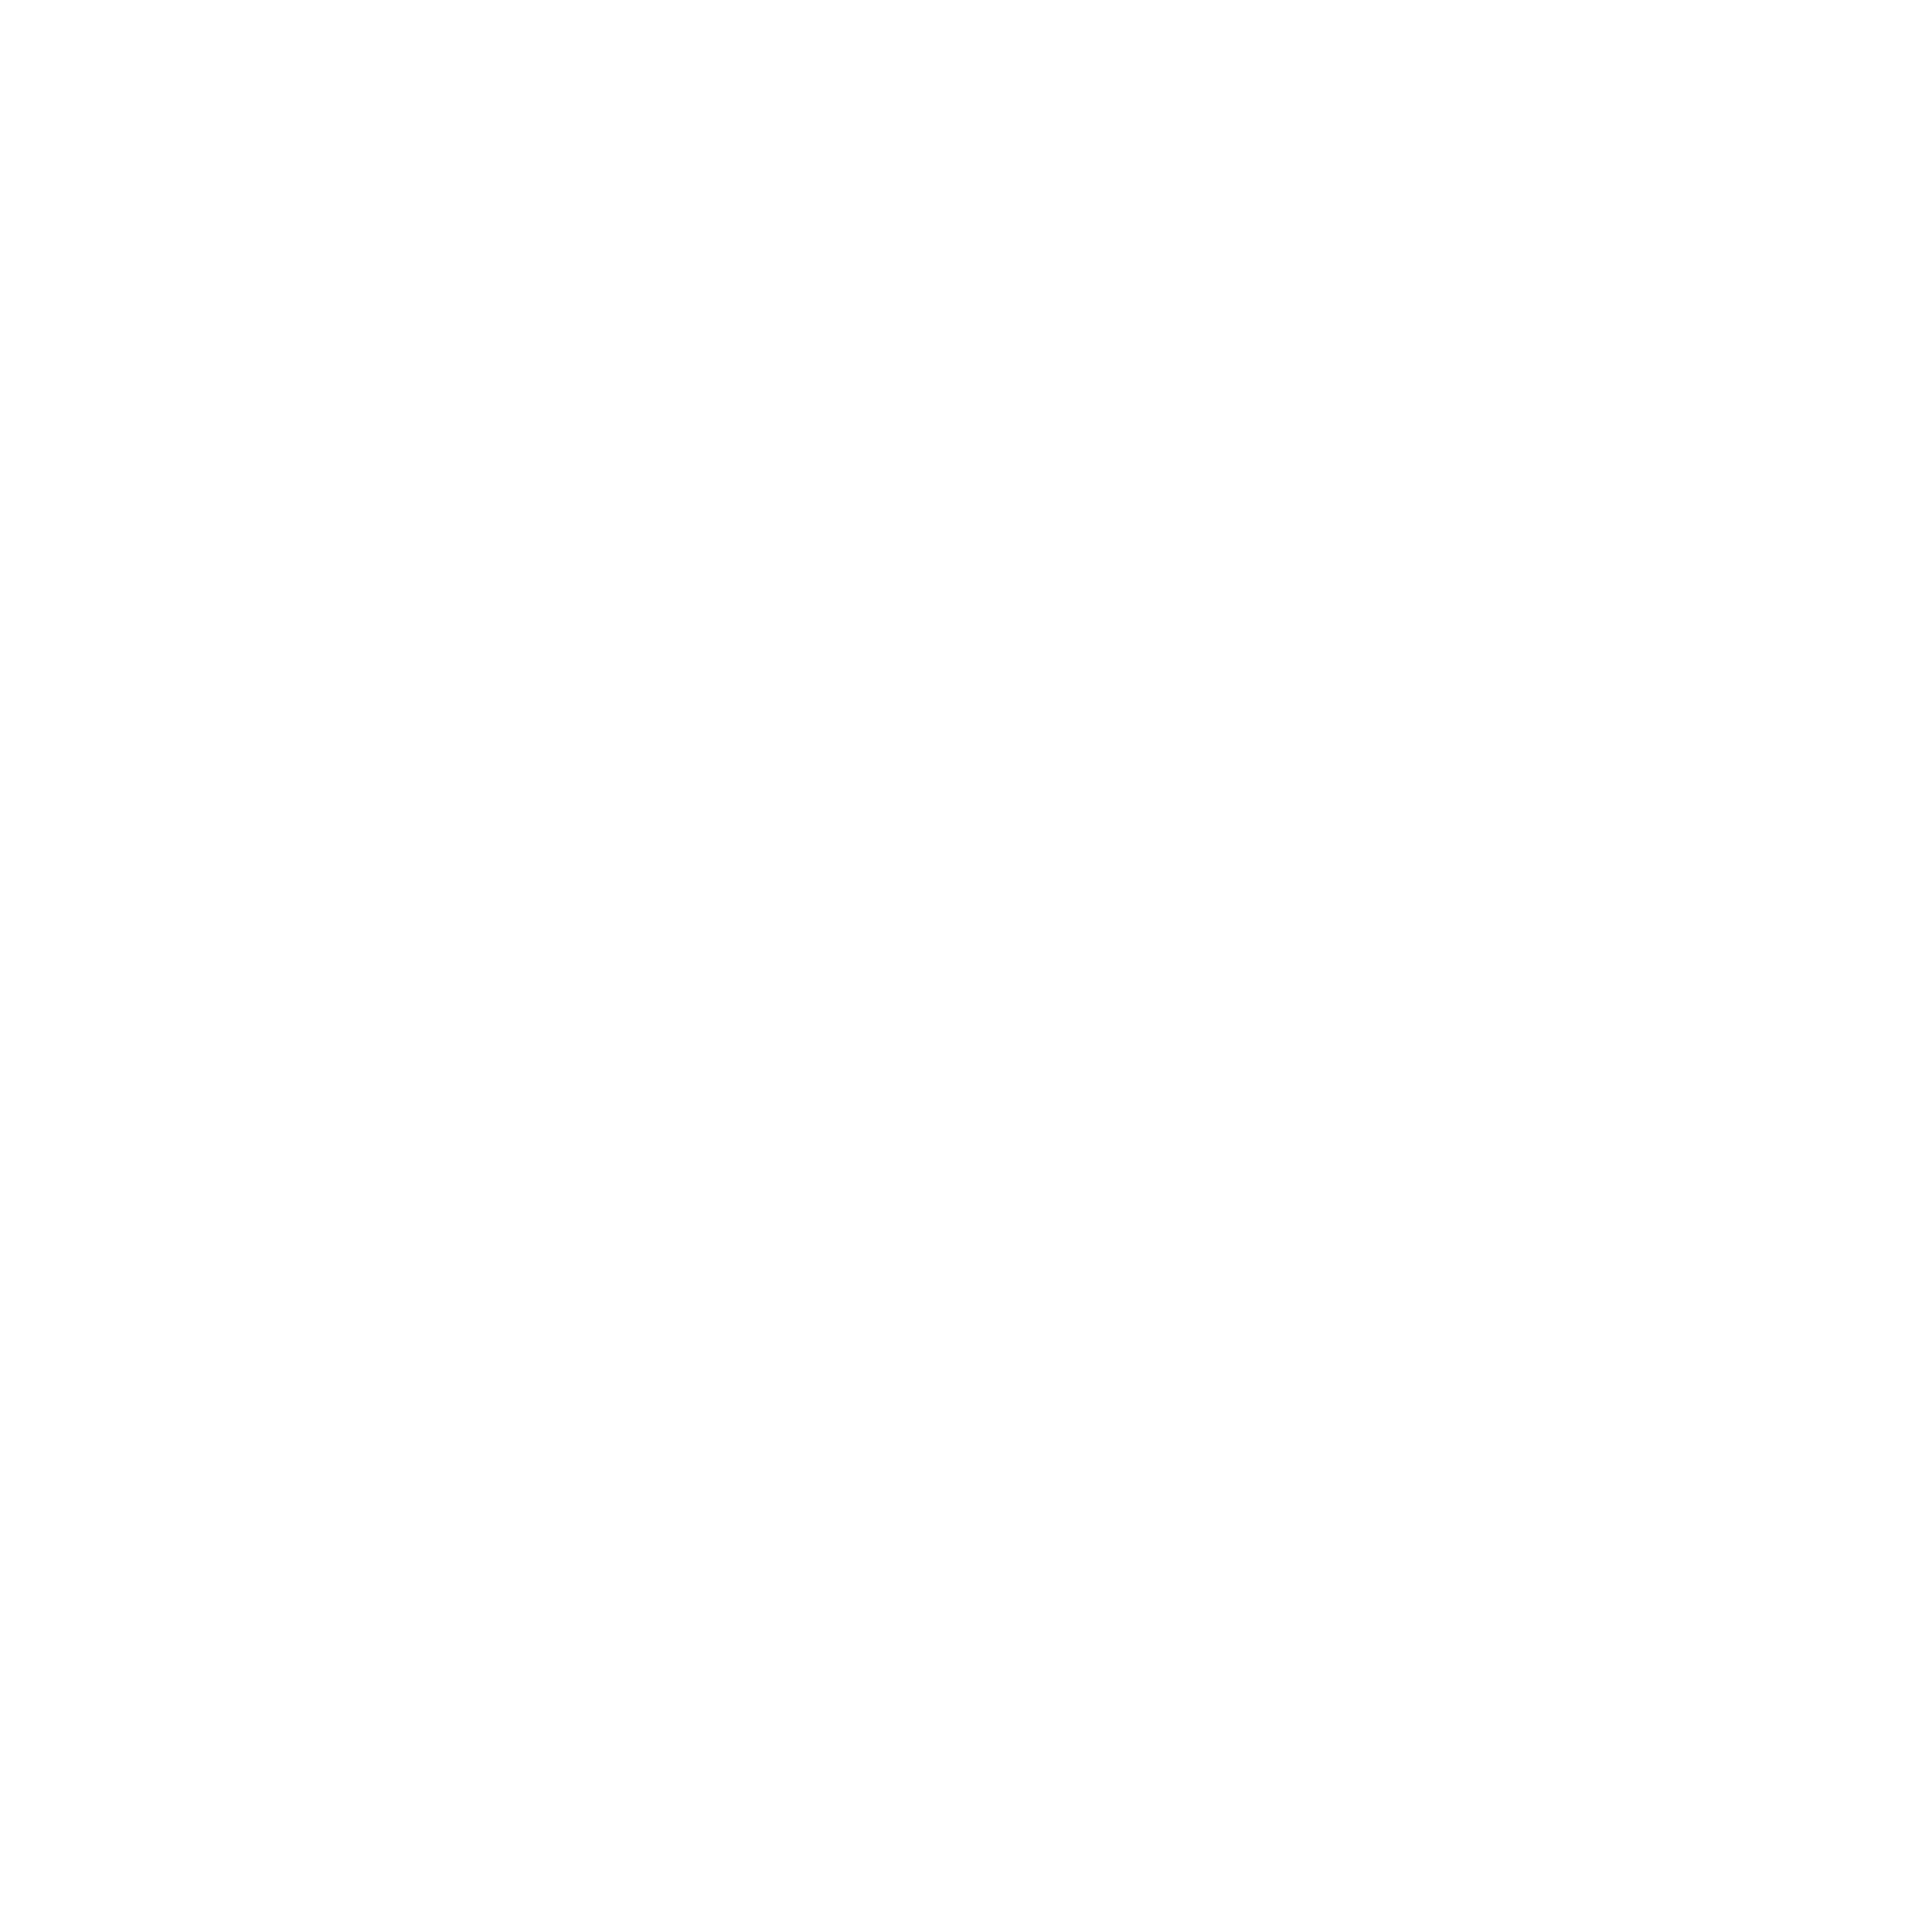

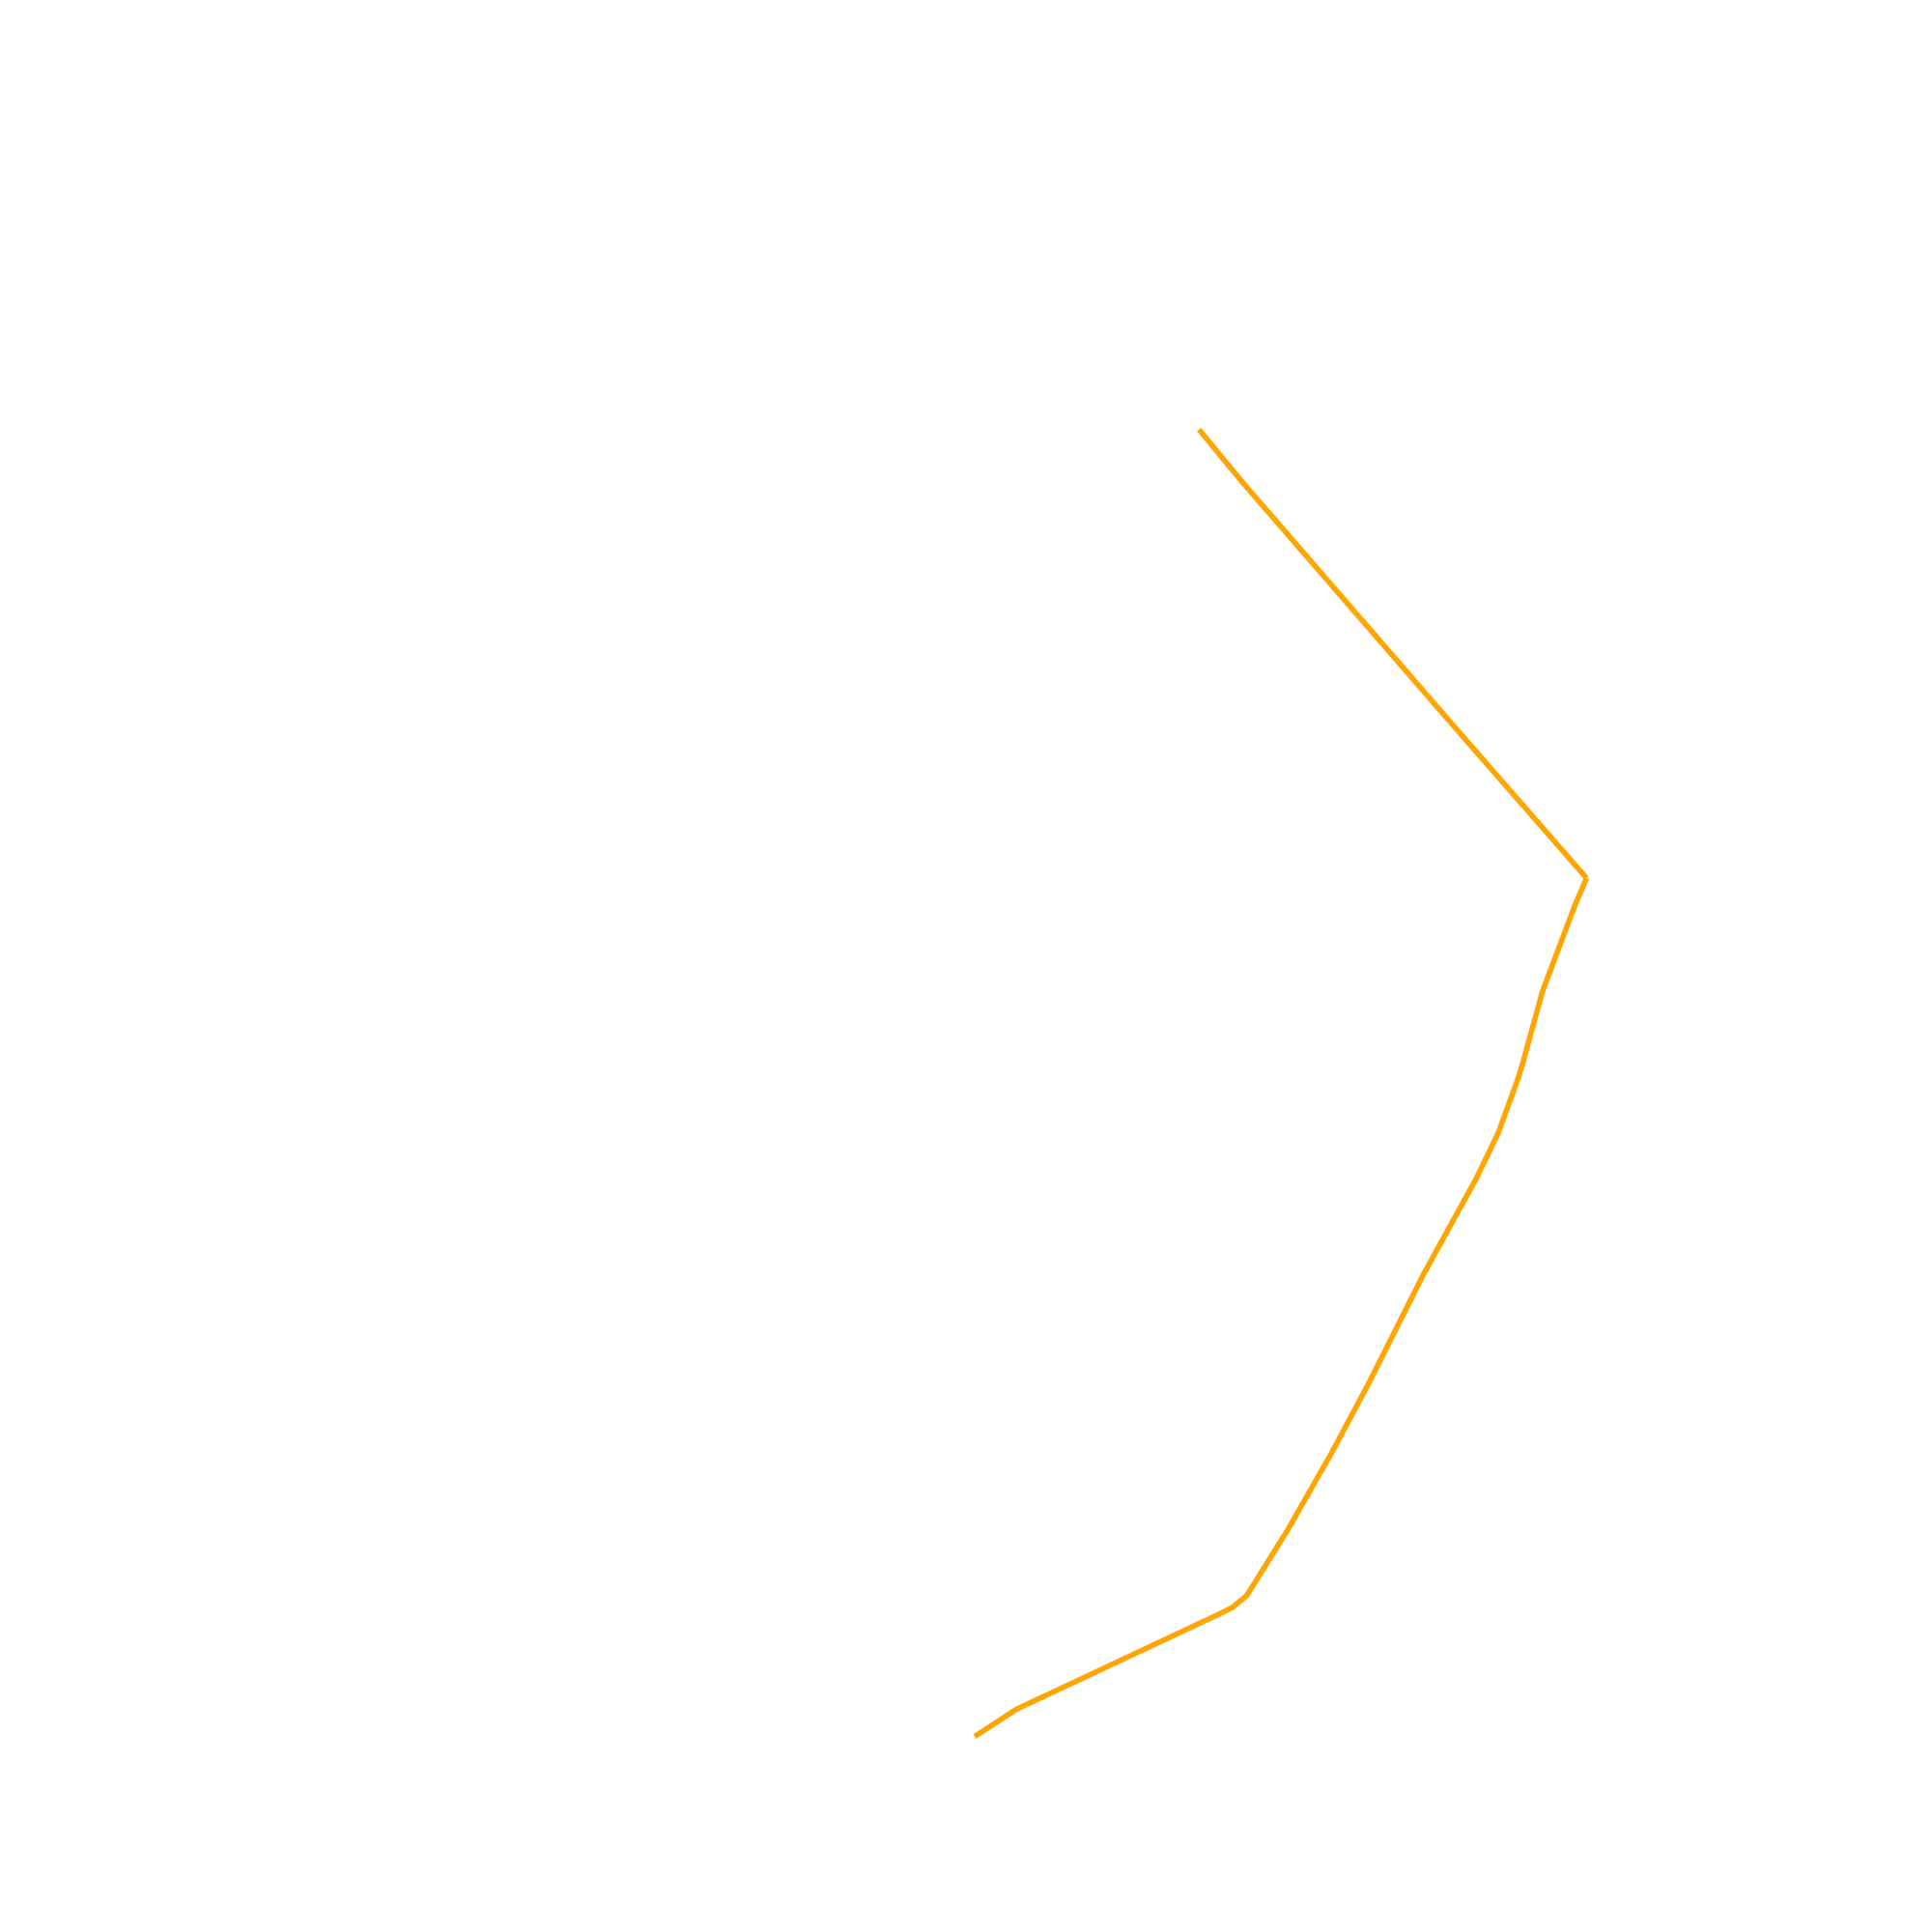

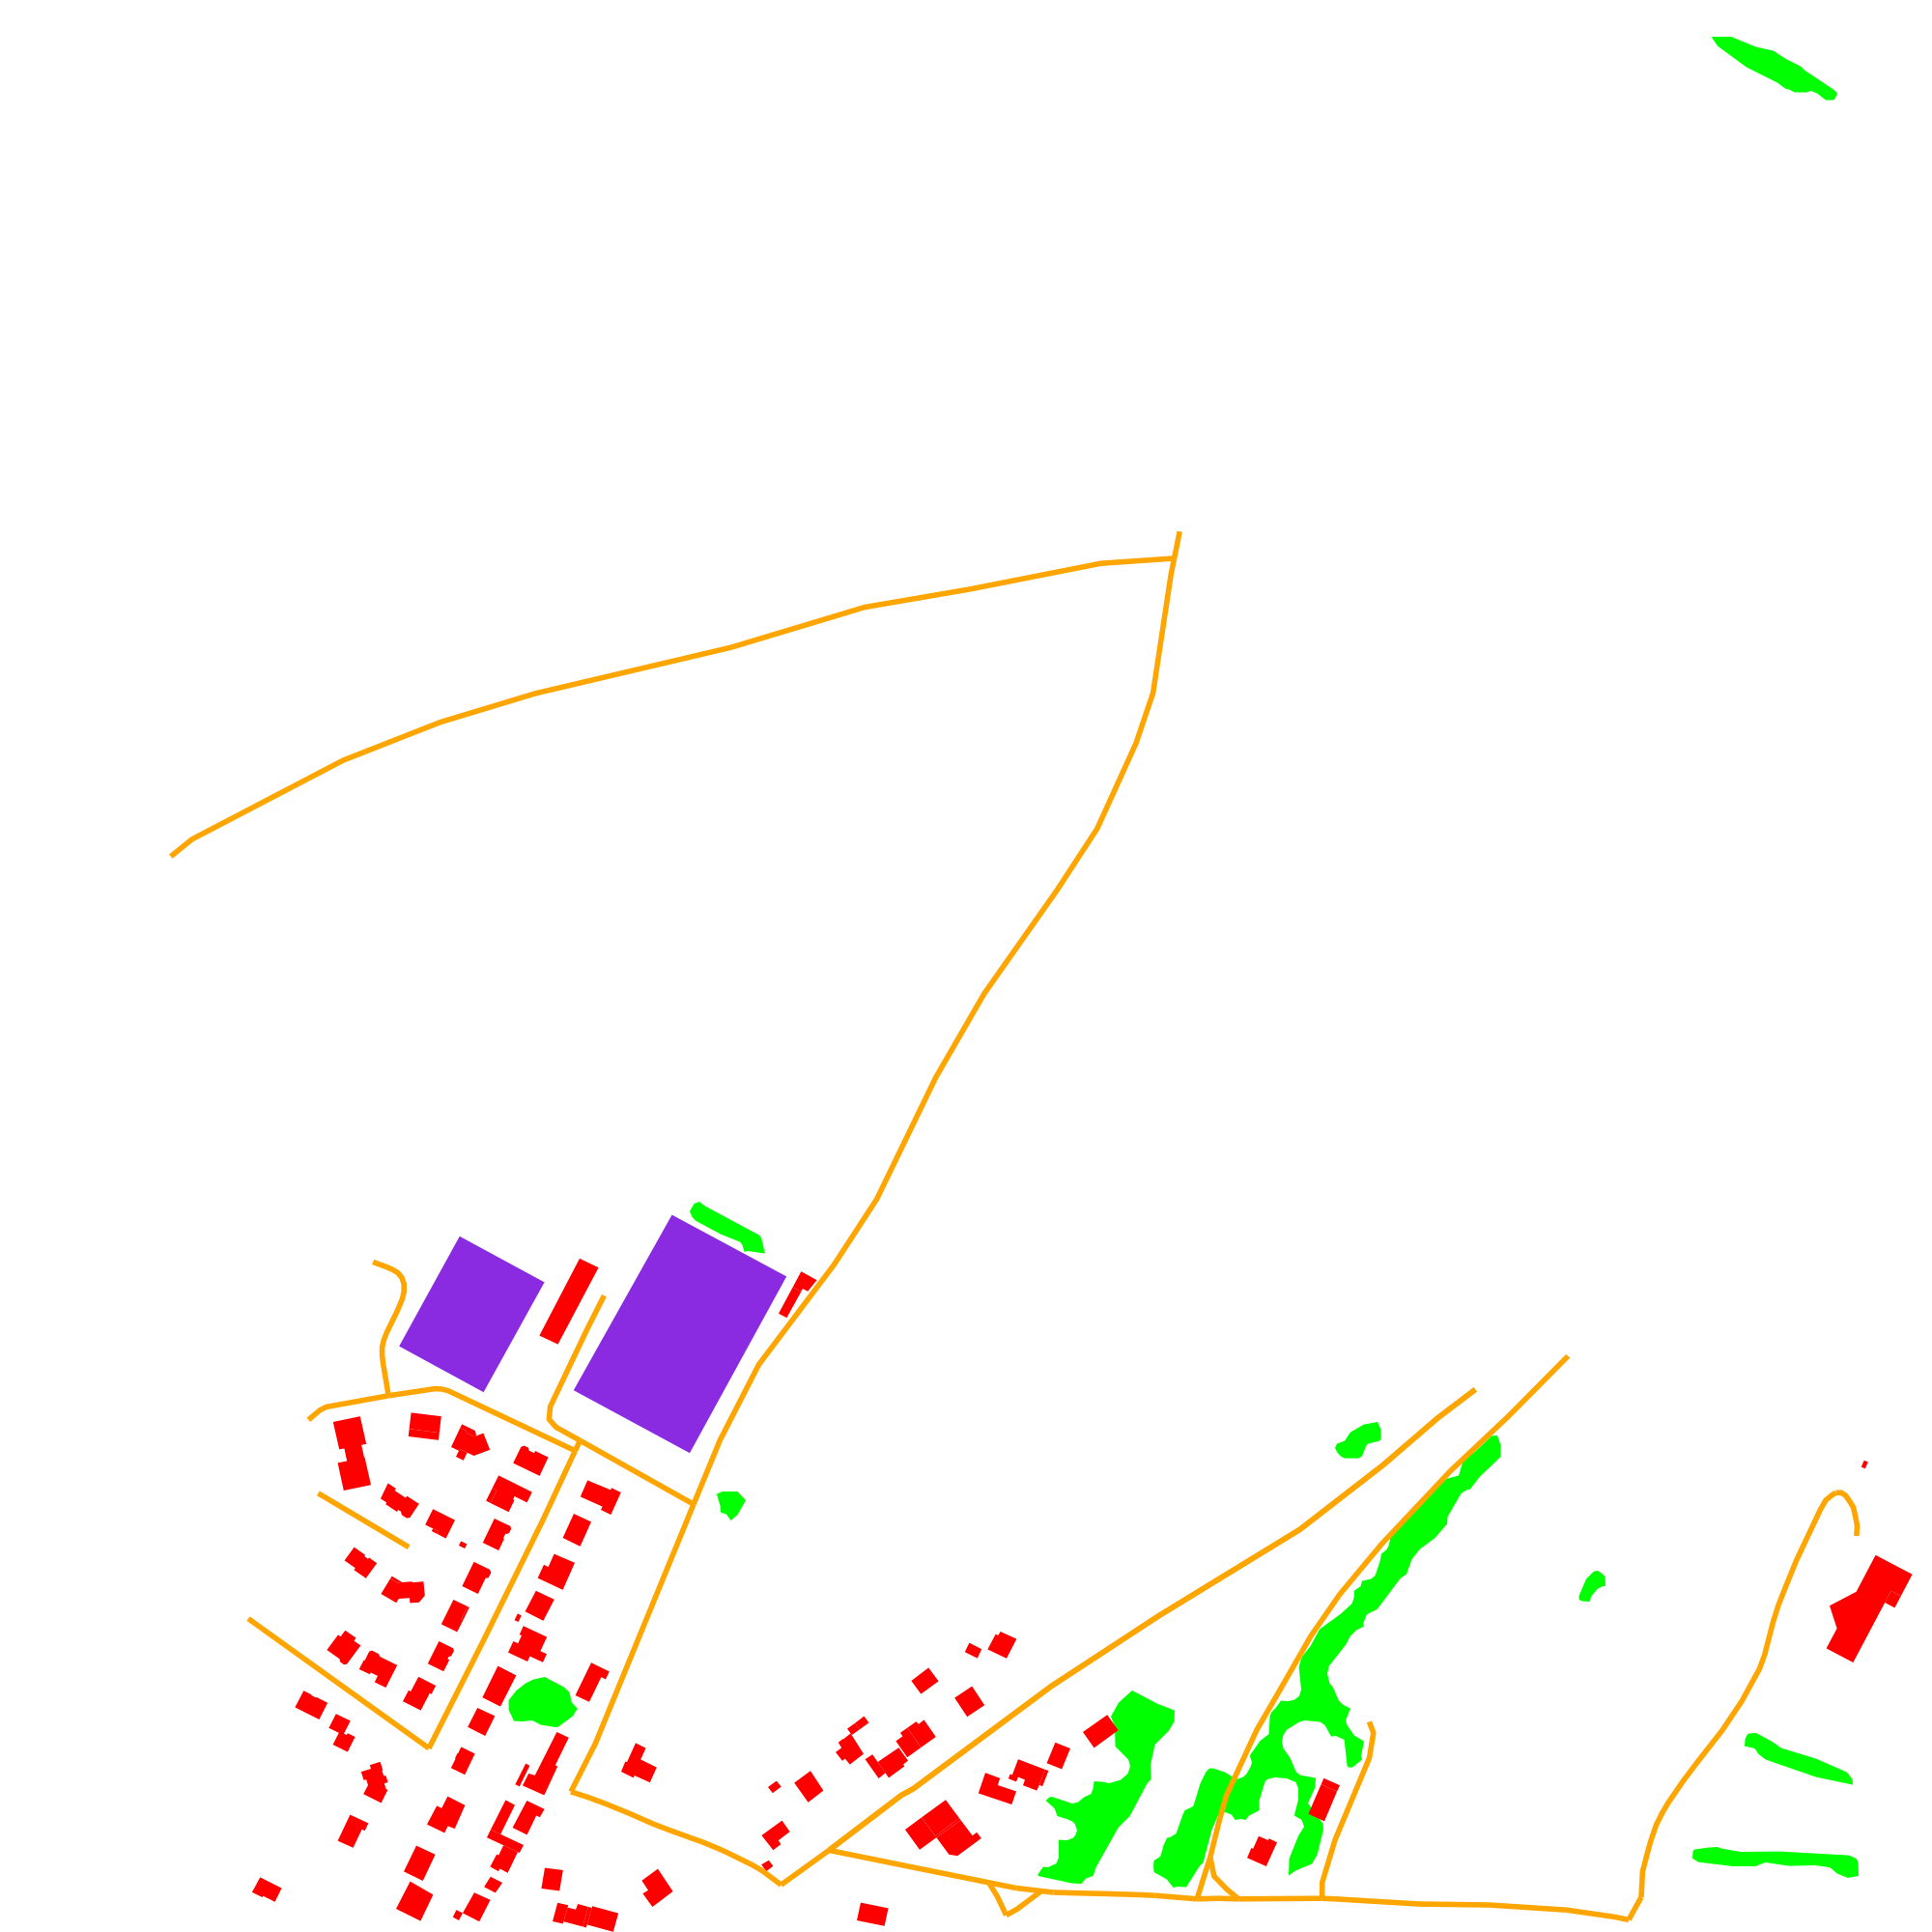

In [345]:
my_dpi=300
for i in range(1): # range - number of images len(image_files)
    name = image_files[i][-36:]
    print(name)
    with rasterio.open(image_files[i]) as dataset:
    # Read the dataset's valid data mask as a ndarray.
        mask = dataset.dataset_mask()
        # Extract feature shapes and values from the array.
        for geom, val in rasterio.features.shapes(
                mask, transform=dataset.transform):
            # Transform shapes from the dataset's own coordinate
            # reference system to CRS84 (EPSG:4326).
            geom = rasterio.warp.transform_geom(
                dataset.crs, 'epsg:2154', geom, precision=0)
            
            bb_box = geom['coordinates'] #  GeoJSON shapes to stdout.
            polygon_bbox = Polygon(bb_box[0])
            polygon_bbox.bounds # image geo bounds
            polygons = return_polygons(image_bounds=polygon_bbox.bounds,  resolution = (1000,1000)) # cut image into patches, the geo res is used
            
            # create a directory where the patches will be stored
            try:
                os.mkdir("D:/allegoria/topo_ortho/ING_processed_margo/moselle/" + name[:-4])
            except:
                print("already exists!")       
            pd_poly = pd.DataFrame(polygons)
            pd_poly.to_csv("D:/allegoria/topo_ortho/ING_processed_margo/moselle/" + name[:-4] +"/geo_polygons.csv")
            for count, polygon_patch in enumerate(polygons):
                # get rastr patch and save
                out_image, _ = rasterio.mask.mask(raster, [polygon_patch], crop=True)
                new_im = Image.fromarray(np.swapaxes(out_image,0,2))
                new_im.save("D:/allegoria/topo_ortho/ING_processed_margo/moselle/" 
                                  + name[:-4] +"/"+str(count).zfill(4)+"_img.png")
                # get vector data pixelized and save
                # shapefiles
                sg_roads = all_roads[all_roads.geometry.within(polygon_patch)] #extract segments of roads
                sg_houses = ordinary_buildings[ordinary_buildings.geometry.within(polygon_patch)] #extract segments of ordinary buildings
                sg_churches =  churches[churches.geometry.within(polygon_patch)] #churches
                sg_towers =  towers[towers.geometry.within(polygon_patch)] #towers
                sg_monuments =  monuments[monuments.geometry.within(polygon_patch)] #monuments
                sg_forts =   monuments[monuments.geometry.within(polygon_patch)] #forts
                sg_castels = castels[castels.geometry.within(polygon_patch)] # chateux
                sg_arcs =arcs[arcs.geometry.within(polygon_patch)] # arcs
                sg_water = all_water[all_water.geometry.within(polygon_patch)] #extract segments of water
                sg_sport = data_sport[data_sport.geometry.within(polygon_patch)] #extract segments of sport  things
                sg_cemetries = data_cemetries[data_cemetries.geometry.within(polygon_patch)] # cemetries
                sg_aero = data_aero[data_aero.geometry.within(polygon_patch)] # aeroports
                sg_railroads = data_rail[data_rail.geometry.within(polygon_patch)] # railroads
                sg_greenery = all_greenery[all_greenery.geometry.within(polygon_patch)] # forests
                # now get them as image
                fig, ax = plt.subplots(figsize=(20.0, 20.0), dpi=100)      # resolution is fixed for 2000
                
                sg_greenery.plot(color='#00FF00', ax = ax)
                sg_water.plot(color ='#0000FF', ax=ax)
                sg_roads.plot(linewidth=4.0, edgecolor='#FFA500', color ='#FFA500' , ax = ax)
                sg_sport.plot (color ='#8A2BE2', ax = ax)
                sg_houses.plot(color ='#FF0000', ax = ax)
                sg_churches.plot(color ='#FFFF00', ax = ax)
                sg_towers.plot(color ="#A52A2A", ax = ax)
                sg_monuments.plot(color ='#F5F5DC', ax = ax)
                sg_forts.plot(color='#808080', ax = ax)
                sg_castels.plot(color='#000000', ax = ax)
                sg_arcs.plot(color='#C2B280', ax = ax)
                sg_cemetries.plot(color ='#4B0082', ax = ax) 
                sg_aero.plot(color ='#5F021F', ax = ax)
                sg_railroads.plot(color = '#FF00FF', ax = ax)
                ax.set_xlim([polygon_patch.bounds[0],polygon_patch.bounds[2]])
                ax.set_ylim([polygon_patch.bounds[3],polygon_patch.bounds[1]])
                ax.set_xticklabels([])
                ax.set_yticklabels([])
                ax.axis('off')
                plt.subplots_adjust(left=0., right=1., top=1., bottom=0.)
                plt.savefig("D:/allegoria/topo_ortho/ING_processed_margo/moselle/" + name[:-4] +"/"+ str(count).zfill(4) +"_lbl.png", dpi= 100, bbox_inches='tight', pad_inches=0) # save the resulting figure

            
            
            
            
            
      

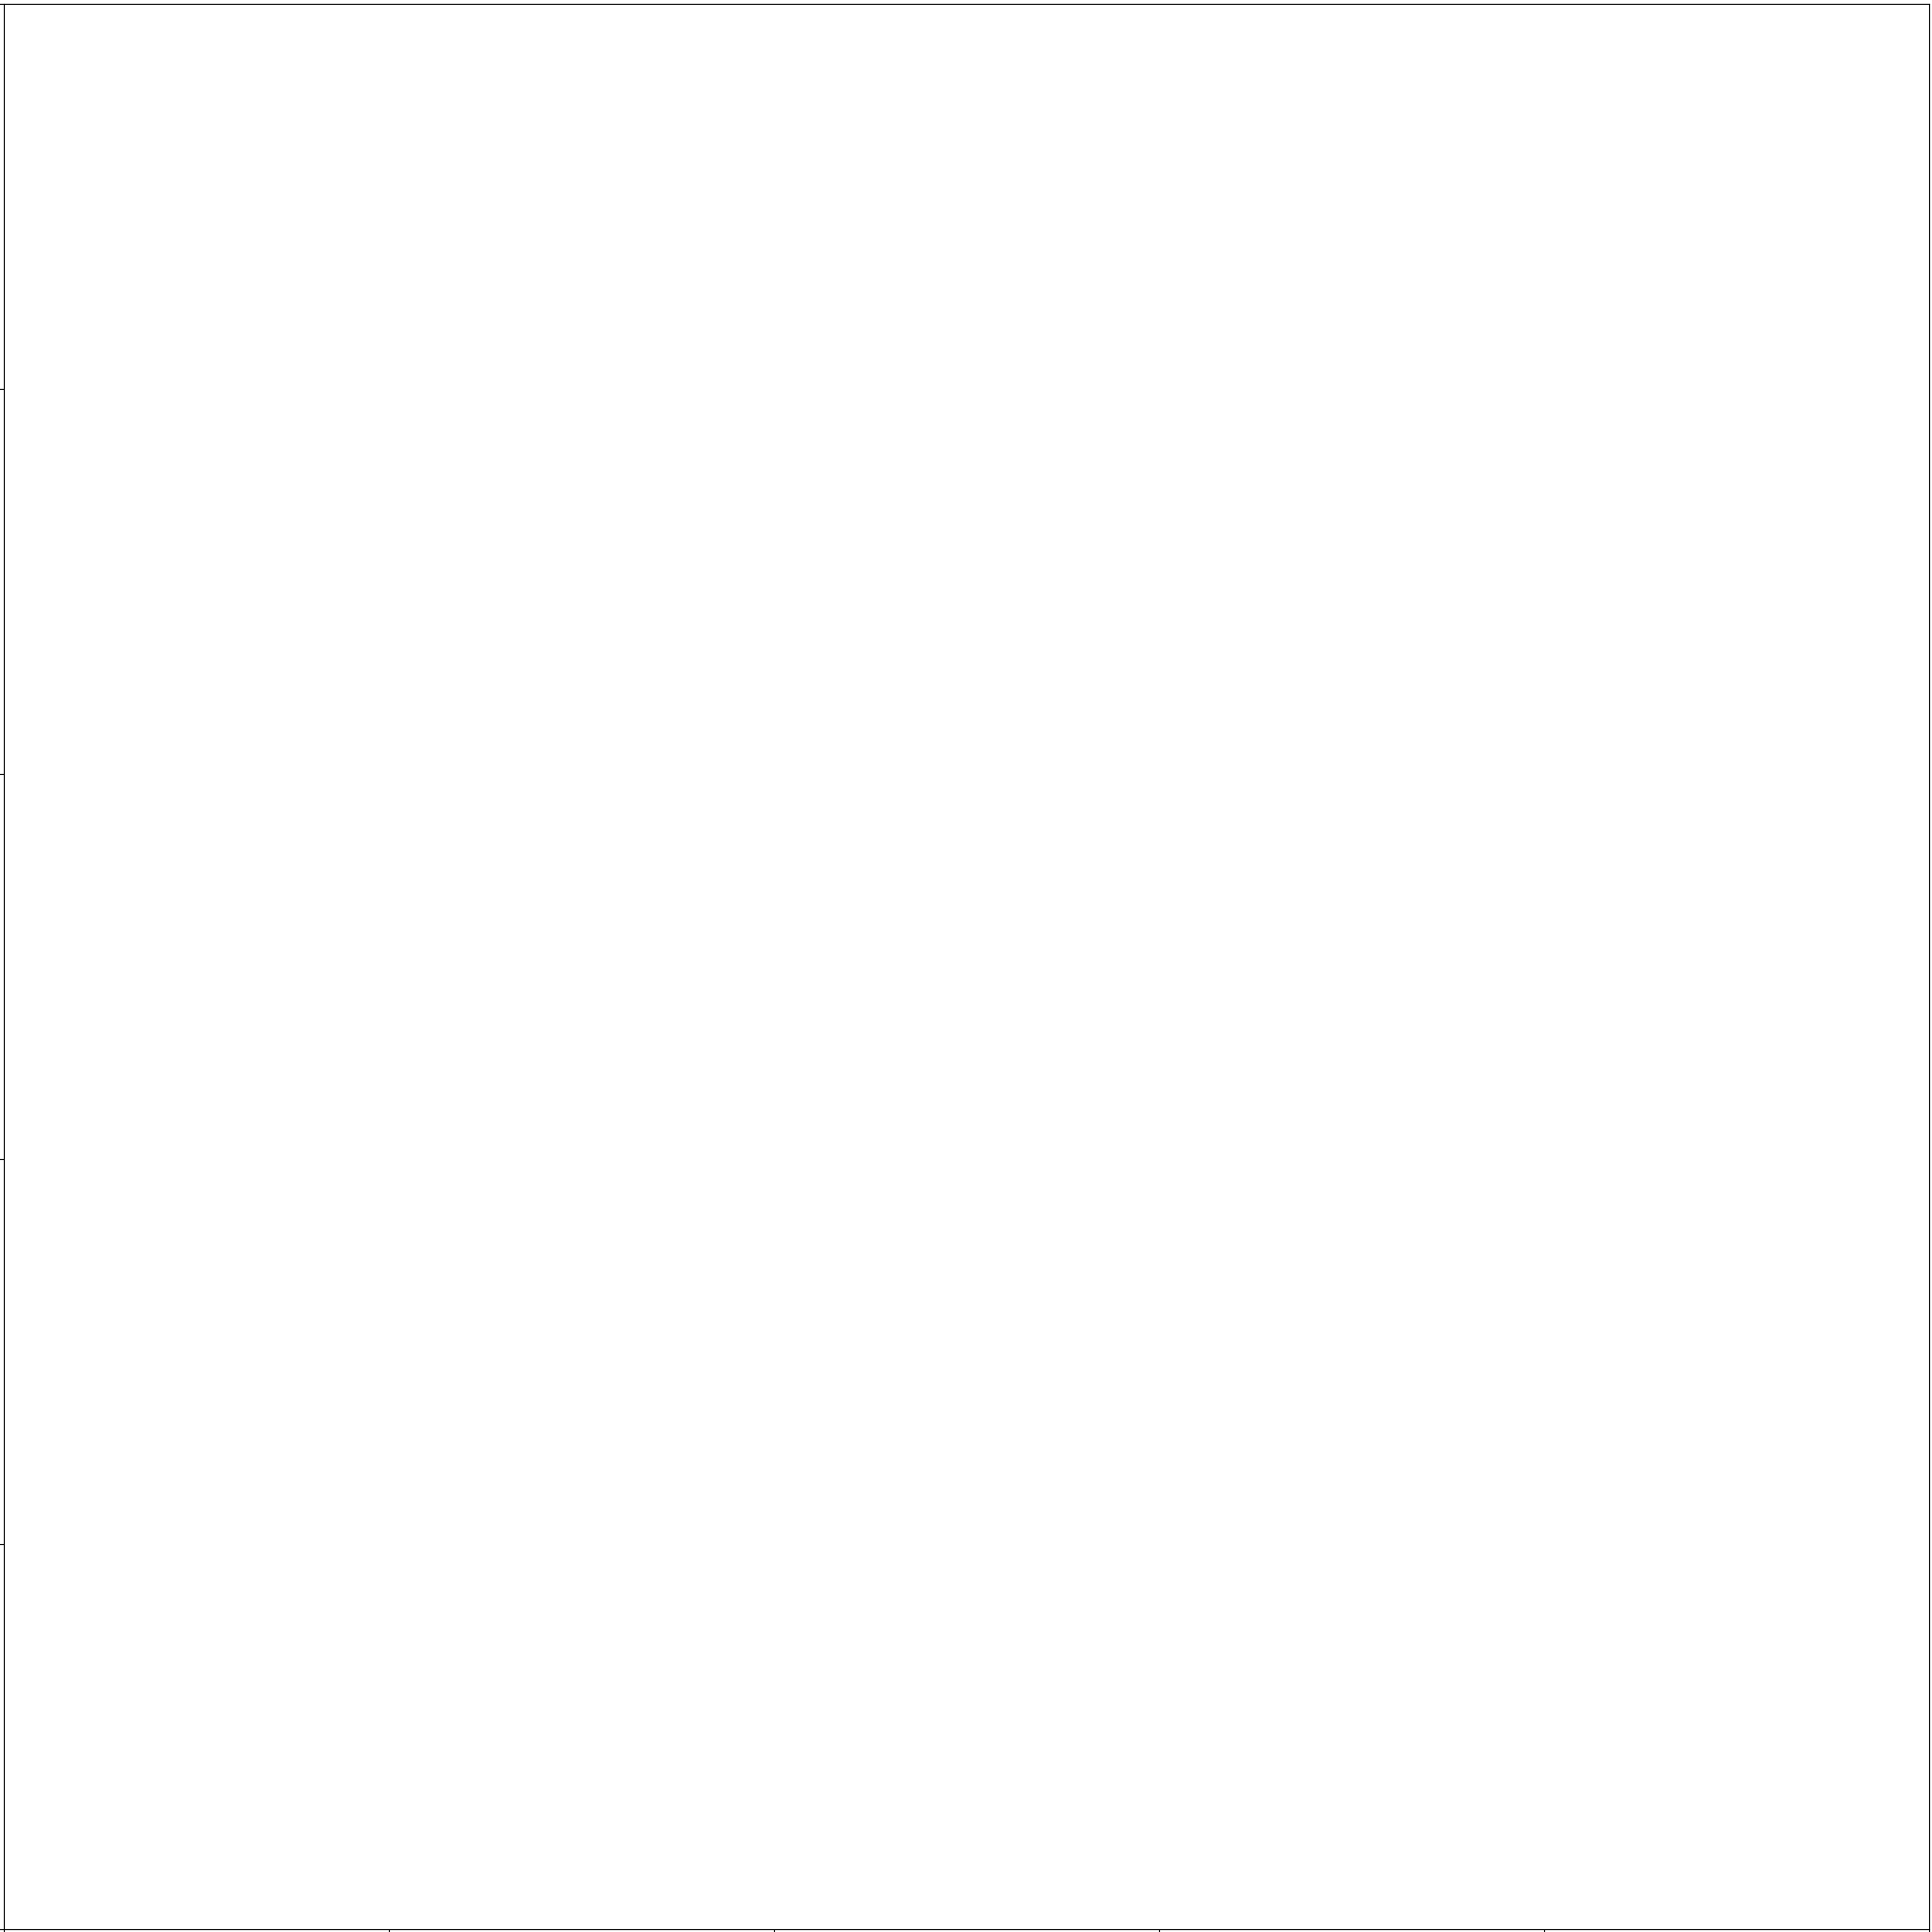

In [342]:
# get vector data pixelized and save

out_image, _ = rasterio.mask.mask(raster, [polygon_patch], crop=True)
new_im = Image.fromarray(np.swapaxes(out_image,0,2))
new_im.save("D:/allegoria/topo_ortho/ING_processed_margo/moselle/" 
                                  + name[:-4] +"/"+str(count).zfill(4)+"_img.png")
# shapefiles
sg_roads = all_roads[all_roads.geometry.within(polygon_patch)] #extract segments of roads
sg_houses = ordinary_buildings[ordinary_buildings.geometry.within(polygon_patch)] #extract segments of ordinary buildings
sg_churches =  churches[churches.geometry.within(polygon_patch)] #churches
sg_towers =  towers[towers.geometry.within(polygon_patch)] #towers
sg_monuments =  monuments[monuments.geometry.within(polygon_patch)] #monuments
sg_forts =   monuments[monuments.geometry.within(polygon_patch)] #forts
sg_castels = castels[castels.geometry.within(polygon_patch)] # chateux
sg_arcs =arcs[arcs.geometry.within(polygon_patch)] # arcs
sg_water = all_water[all_water.geometry.within(polygon_patch)] #extract segments of water
sg_sport = data_sport[data_sport.geometry.within(polygon_patch)] #extract segments of sport  things
sg_cemetries = data_cemetries[data_cemetries.geometry.within(polygon_patch)] # cemetries
sg_aero = data_aero[data_aero.geometry.within(polygon_patch)] # aeroports
sg_railroads = data_rail[data_rail.geometry.within(polygon_patch)] # railroads
sg_greenery = all_greenery[all_greenery.geometry.within(polygon_patch)] # forests
# now get them as image
fig, ax = plt.subplots(figsize=(20.0, 20.0), dpi=100)   
#ax.imshow(new_im)
sg_greenery.plot(color='#00FF00', ax = ax)
sg_water.plot(color ='#0000FF', ax=ax)
sg_roads.plot(linewidth=0.51, edgecolor='#FFA500', ax = ax)
sg_sport.plot (color ='#8A2BE2', ax = ax)
sg_houses.plot(color ='#FF0000', ax = ax)
sg_churches.plot(color ='#FFFF00', ax = ax)
sg_towers.plot(color ="#A52A2A", ax = ax)
sg_monuments.plot(color ='#F5F5DC', ax = ax)
sg_forts.plot(color='#808080', ax = ax)
sg_castels.plot(color='#000000', ax = ax)
sg_arcs.plot(color='#C2B280', ax = ax)
sg_cemetries.plot(color ='#4B0082', ax = ax) 
sg_aero.plot(color ='#5F021F', ax = ax)
sg_railroads.plot(color = '#FF00FF', ax = ax)
ax.set_xlim([polygon_patch.bounds[0],polygon_patch.bounds[2]])
ax.set_ylim([polygon_patch.bounds[3],polygon_patch.bounds[1]])
ax.set_xticklabels([])
ax.set_yticklabels([])
#ax.axis('off')
plt.subplots_adjust(left=0., right=1., top=1., bottom=0.)

plt.savefig("D:/allegoria/topo_ortho/ING_processed_margo/moselle/" + name[:-4] +"/"+ str(count).zfill(4) +"_lbl.png", dpi= 100, bbox_inches='tight', pad_inches=0) # save the resulting figure

In [328]:
print(polygon_patch.bounds)

(906000.0, 6934000.0, 907000.0, 6935000.0)


In [251]:
print(out_transform)

| 0.50, 0.00, 905000.00|
| 0.00,-0.50, 6931000.00|
| 0.00, 0.00, 1.00|


In [250]:
print(len(polygons))

25


In [248]:
import rasterio
import rasterio.mask
out_image, out_transform = rasterio.mask.mask(raster, [polygons[0]],
                                                        crop=True)

(3, 2000, 2000)


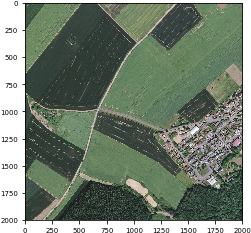

In [247]:
print(out_image.shape)
plt.imshow(np.swapaxes(out_image,0,2))

In [249]:
print(polygons[0])

POLYGON ((905000 6930000, 905000 6931000, 906000 6931000, 906000 6930000, 905000 6930000))


In [216]:
def return_polygons(image_bounds, resolution = (1000,1000)):
    

    list_polygons = []
    index = 0
    for height in range(int(image_bounds[0]), int(image_bounds[2]), resolution[0]):
        for width in range(int(image_bounds[1]),int(image_bounds[3]), resolution[1]):
            poly = Polygon([[height, width], [height ,width+resolution[1]], [height+resolution[0], width+resolution[1]], [height+resolution[0],width]])
            list_polygons.append(poly)
    return list_polygons

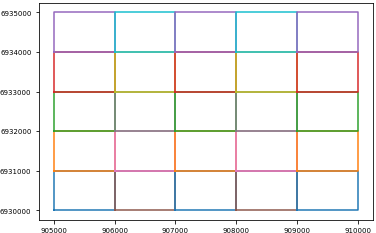

In [177]:
for i in range(905000, 910000, 1000):
    print(i)

905000
906000
907000
908000
909000


In [207]:
print(len(polygons))

25
